# Synthesizing insights from complex experiments

## Visualizing loan approval yield
In the realm of financial services, understanding the factors that influence loan approval rates is crucial for both lenders and borrowers. A financial institution has conducted a study and collected data on loan applications, detailing the amount requested, the applicant's credit score, employment status, and the ultimate yield of the approval process. This rich dataset offers a window into the nuanced dynamics at play in loan decision-making. You have been asked to dive into the loan_approval_yield dataset to understand how loan amounts and credit scores influence approval yields.



* Create a side-by-side bar graph, setting the x-axis to 'LoanAmount', the y-axis to 'ApprovalYield', and differentiating the bars with hues for 'CreditScore'.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
n_samples = 2150

# Define categories
loan_amounts = ['Low', 'Medium', 'High']
credit_scores = ['Poor', 'Fair', 'Good', 'Excellent']
employment_statuses = ['Employed', 'Unemployed', 'Self-Employed']

# Create base approval yields based on combinations
approval_yield_ranges = {
    ('Low', 'Poor'): (0.1, 0.3),
    ('Low', 'Fair'): (0.3, 0.5),
    ('Low', 'Good'): (0.5, 0.7),
    ('Low', 'Excellent'): (0.7, 0.9),
    ('Medium', 'Poor'): (0.2, 0.4),
    ('Medium', 'Fair'): (0.4, 0.6),
    ('Medium', 'Good'): (0.6, 0.8),
    ('Medium', 'Excellent'): (0.75, 0.95),
    ('High', 'Poor'): (0.05, 0.25),
    ('High', 'Fair'): (0.25, 0.45),
    ('High', 'Good'): (0.55, 0.75),
    ('High', 'Excellent'): (0.65, 0.85)
}

# Create the DataFrame
loan_approval_yield = pd.DataFrame({
    'ApplicationID': range(1, n_samples + 1),
    'LoanAmount': np.random.choice(loan_amounts, size=n_samples, p=[0.4, 0.4, 0.2]),
    'CreditScore': np.random.choice(credit_scores, size=n_samples, p=[0.2, 0.3, 0.3, 0.2]),
    'EmploymentStatus': np.random.choice(employment_statuses, size=n_samples, p=[0.5, 0.3, 0.2]),
    'ApprovalYield': np.zeros(n_samples)
})

# Generate approval yields based on loan amount and credit score combinations
for i in range(len(loan_approval_yield)):
    loan_amt = loan_approval_yield.loc[i, 'LoanAmount']
    credit_score = loan_approval_yield.loc[i, 'CreditScore']
    
    # Get base range
    low_range, high_range = approval_yield_ranges[(loan_amt, credit_score)]
    
    # Add employment status effect
    emp_status = loan_approval_yield.loc[i, 'EmploymentStatus']
    if emp_status == 'Employed':
        low_range += 0.05
        high_range += 0.05
    elif emp_status == 'Self-Employed':
        low_range -= 0.03
        high_range -= 0.03
    
    # Ensure values stay within 0-1 range
    low_range = max(0, min(low_range, 0.95))
    high_range = max(0.05, min(high_range, 1.0))
    
    # Generate final approval yield
    loan_approval_yield.loc[i, 'ApprovalYield'] = np.random.uniform(low_range, high_range)

print(loan_approval_yield)
print(f"\nDataFrame shape: {loan_approval_yield.shape}")
print(f"\nLoan Amount distribution:\n{loan_approval_yield['LoanAmount'].value_counts()}")
print(f"\nCredit Score distribution:\n{loan_approval_yield['CreditScore'].value_counts()}")
print(f"\nEmployment Status distribution:\n{loan_approval_yield['EmploymentStatus'].value_counts()}")

      ApplicationID LoanAmount CreditScore EmploymentStatus  ApprovalYield
0                 1        Low        Fair         Employed       0.518219
1                 2       High        Poor    Self-Employed       0.219370
2                 3     Medium        Good       Unemployed       0.686069
3                 4     Medium   Excellent       Unemployed       0.814060
4                 5        Low        Poor    Self-Employed       0.251331
...             ...        ...         ...              ...            ...
2145           2146       High        Fair       Unemployed       0.358568
2146           2147     Medium        Poor    Self-Employed       0.275929
2147           2148        Low        Poor         Employed       0.219554
2148           2149     Medium        Fair         Employed       0.554104
2149           2150       High        Good       Unemployed       0.681077

[2150 rows x 5 columns]

DataFrame shape: (2150, 5)

Loan Amount distribution:
LoanAmount
Low      

      ApplicationID LoanAmount CreditScore EmploymentStatus  ApprovalYield
0                 1        Low        Fair         Employed       0.518219
1                 2       High        Poor    Self-Employed       0.219370
2                 3     Medium        Good       Unemployed       0.686069
3                 4     Medium   Excellent       Unemployed       0.814060
4                 5        Low        Poor    Self-Employed       0.251331
...             ...        ...         ...              ...            ...
2145           2146       High        Fair       Unemployed       0.358568
2146           2147     Medium        Poor    Self-Employed       0.275929
2147           2148        Low        Poor         Employed       0.219554
2148           2149     Medium        Fair         Employed       0.554104
2149           2150       High        Good       Unemployed       0.681077

[2150 rows x 5 columns]


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


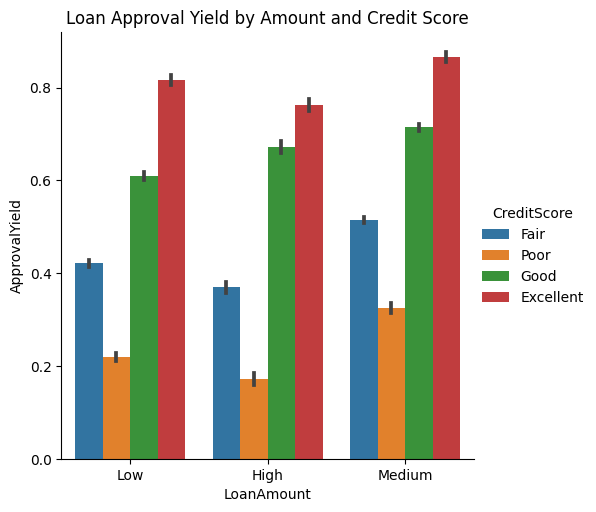

In [4]:
print(loan_approval_yield)

# Use Seaborn to create the bar graph
sns.catplot(x="LoanAmount", 
            y="ApprovalYield", 
            hue="CreditScore", 
            kind="bar", 
            data=loan_approval_yield)
plt.title("Loan Approval Yield by Amount and Credit Score")
plt.show()

The data shows that Poor credit scores tend to have similar approval yields across various loan amounts, while Good credit scores exhibit more variability, reflecting different lending criteria based on the loan size.

## Exploring customer satisfaction
Merging datasets is a crucial skill in data analysis, especially when dealing with related data from different sources. You're working on a project for a financial institution to understand the relationship between loan approval rates and customer satisfaction. Two separate studies have been conducted: one focusing on loan approval yield based on various factors, and another on customer satisfaction under different conditions. Your task is to analyze how approval yield correlates with customer satisfaction, considering another variable such as interest rates.

The loan_approval_yield and customer_satisfaction DataFrames, pandas as pd, numpy as np, seaborn as sns, and matplotlib.pyplot as plt have been loaded for you.


* Merge loan_approval_yield with customer_satisfaction.
* Create a scatter plot to compare 'SatisfactionQuality' versus 'ApprovalYield', coloring the points by 'InterestRate'.

In [6]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data with same ApplicationIDs as loan_approval_yield
n_samples = 2150

# Define categories
response_times = ['Fast', 'Moderate', 'Slow']
interest_rates = ['Low', 'Medium', 'High']
customer_interactions = ['Poor', 'Average', 'Good']

# Create base satisfaction probabilities based on combinations
satisfaction_ranges = {
    ('Fast', 'Low', 'Good'): (0.8, 0.95),
    ('Fast', 'Low', 'Average'): (0.6, 0.8),
    ('Fast', 'Low', 'Poor'): (0.4, 0.6),
    ('Fast', 'Medium', 'Good'): (0.7, 0.9),
    ('Fast', 'Medium', 'Average'): (0.5, 0.7),
    ('Fast', 'Medium', 'Poor'): (0.3, 0.5),
    ('Fast', 'High', 'Good'): (0.6, 0.8),
    ('Fast', 'High', 'Average'): (0.4, 0.6),
    ('Fast', 'High', 'Poor'): (0.2, 0.4),
    
    ('Moderate', 'Low', 'Good'): (0.7, 0.9),
    ('Moderate', 'Low', 'Average'): (0.5, 0.7),
    ('Moderate', 'Low', 'Poor'): (0.3, 0.5),
    ('Moderate', 'Medium', 'Good'): (0.6, 0.8),
    ('Moderate', 'Medium', 'Average'): (0.4, 0.6),
    ('Moderate', 'Medium', 'Poor'): (0.2, 0.4),
    ('Moderate', 'High', 'Good'): (0.5, 0.7),
    ('Moderate', 'High', 'Average'): (0.3, 0.5),
    ('Moderate', 'High', 'Poor'): (0.1, 0.3),
    
    ('Slow', 'Low', 'Good'): (0.6, 0.8),
    ('Slow', 'Low', 'Average'): (0.4, 0.6),
    ('Slow', 'Low', 'Poor'): (0.2, 0.4),
    ('Slow', 'Medium', 'Good'): (0.5, 0.7),
    ('Slow', 'Medium', 'Average'): (0.3, 0.5),
    ('Slow', 'Medium', 'Poor'): (0.1, 0.3),
    ('Slow', 'High', 'Good'): (0.4, 0.6),
    ('Slow', 'High', 'Average'): (0.2, 0.4),
    ('Slow', 'High', 'Poor'): (0.0, 0.2),
}

# Create the DataFrame with same ApplicationIDs
customer_satisfaction = pd.DataFrame({
    'ApplicationID': range(1, n_samples + 1),
    'ResponseTime': np.random.choice(response_times, size=n_samples, p=[0.5, 0.3, 0.2]),
    'InterestRate': np.random.choice(interest_rates, size=n_samples, p=[0.3, 0.4, 0.3]),
    'CustomerInteraction': np.random.choice(customer_interactions, size=n_samples, p=[0.2, 0.5, 0.3]),
    'SatisfactionQuality': np.zeros(n_samples)
})

# Generate satisfaction quality based on combinations
for i in range(len(customer_satisfaction)):
    response_time = customer_satisfaction.loc[i, 'ResponseTime']
    interest_rate = customer_satisfaction.loc[i, 'InterestRate']
    interaction = customer_satisfaction.loc[i, 'CustomerInteraction']
    
    # Get base range
    low_range, high_range = satisfaction_ranges[(response_time, interest_rate, interaction)]
    
    # Generate final satisfaction quality
    customer_satisfaction.loc[i, 'SatisfactionQuality'] = np.random.uniform(low_range, high_range)

print(customer_satisfaction)
print(f"\nDataFrame shape: {customer_satisfaction.shape}")
print(f"\nResponse Time distribution:\n{customer_satisfaction['ResponseTime'].value_counts()}")
print(f"\nInterest Rate distribution:\n{customer_satisfaction['InterestRate'].value_counts()}")
print(f"\nCustomer Interaction distribution:\n{customer_satisfaction['CustomerInteraction'].value_counts()}")

      ApplicationID ResponseTime InterestRate CustomerInteraction  \
0                 1         Fast       Medium                Poor   
1                 2         Slow          Low                Good   
2                 3     Moderate         High                Good   
3                 4     Moderate         High             Average   
4                 5         Fast          Low                Good   
...             ...          ...          ...                 ...   
2145           2146         Slow          Low             Average   
2146           2147         Fast          Low                Good   
2147           2148         Fast          Low             Average   
2148           2149         Fast       Medium                Poor   
2149           2150         Slow       Medium             Average   

      SatisfactionQuality  
0                0.468219  
1                0.799370  
2                0.586069  
3                0.364060  
4                0.935998  
...

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


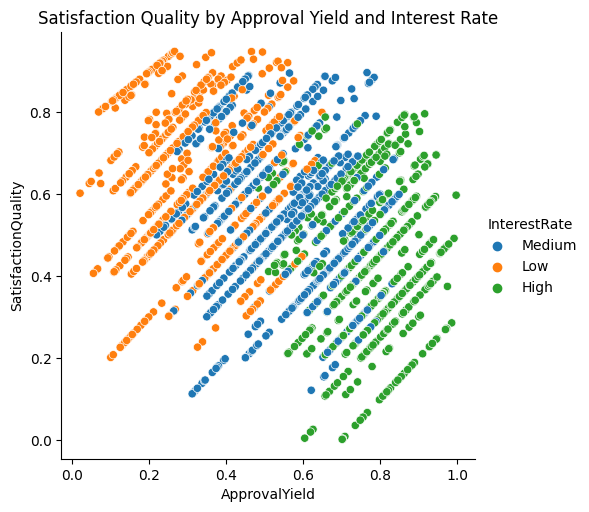

In [7]:
# Merge the two datasets
merged_data = pd.merge(loan_approval_yield, 
                       customer_satisfaction, 
                       on='ApplicationID')

# Use Seaborn to create the scatter plot
sns.relplot(x="ApprovalYield", 
            y="SatisfactionQuality", 
            hue="InterestRate", 
            kind="scatter", 
            data=merged_data)
plt.title("Satisfaction Quality by Approval Yield and Interest Rate")
plt.show()

There isn't a strong relationship between Customer Satisfaction and Approval Yield in this experimental data. The resulting scatterplot looks similar to white noise scattered all about even when including Interest Rate.

 The scatterplot does not demonstrate a strong relationship between Customer Satisfaction and Approval Yield, appearing more like white noise, which indicates that these variables do not strongly influence each other in this dataset.



# Addressing complexities in experimental data

## Check for heteroscedasticity in shelf life
When examining food preservation methods, it's crucial to understand how the variance of one variable, such as shelf life, might change across the range of another variable like nutrient retention. Identifying such patterns, known as heteroscedasticity, can provide insights into the consistency of preservation effects. The food_preservation dataset encapsulates the outcomes of various preservation methods on different food types, specifically highlighting the balance between nutrient retention and resultant shelf life.


* Use an appropriate plot to check for heteroscedasticity between 'NutrientRetention' and 'ShelfLife'.
* 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
n_samples = 500

# Define food types and preservation methods
food_types = ['Fruit', 'Vegetable', 'Meat', 'Dairy', 'Grains']
preservation_methods = ['Refrigeration', 'Freezing', 'Canning', 'Drying', 'Vacuum Sealing']

# Create the DataFrame with heteroscedastic relationship
food_preservation = pd.DataFrame({
    'FoodType': np.random.choice(food_types, size=n_samples, p=[0.25, 0.25, 0.2, 0.15, 0.15]),
    'PreservationMethod': np.random.choice(preservation_methods, size=n_samples, p=[0.3, 0.25, 0.2, 0.15, 0.1]),
    'NutrientRetention': np.zeros(n_samples),
    'ShelfLife': np.zeros(n_samples)
})

# Generate data with heteroscedasticity (variance increases with NutrientRetention)
for i in range(len(food_preservation)):
    # Base nutrient retention (50-95%)
    nutrient_base = np.random.uniform(50, 95)
    
    # Add method effect
    method = food_preservation.loc[i, 'PreservationMethod']
    if method == 'Freezing':
        nutrient_base += np.random.uniform(0, 5)
    elif method == 'Canning':
        nutrient_base -= np.random.uniform(0, 10)
    elif method == 'Drying':
        nutrient_base -= np.random.uniform(5, 15)
    elif method == 'Vacuum Sealing':
        nutrient_base += np.random.uniform(2, 8)
    
    food_preservation.loc[i, 'NutrientRetention'] = max(30, min(nutrient_base, 98))
    
    # Create shelf life with heteroscedastic variance
    # Higher nutrient retention -> longer shelf life but with more variability
    base_shelf_life = 5 + (food_preservation.loc[i, 'NutrientRetention'] / 100) * 45
    
    # Heteroscedastic noise: variance increases with nutrient retention
    noise_scale = 2 + (food_preservation.loc[i, 'NutrientRetention'] / 100) * 8
    noise = np.random.normal(0, noise_scale)
    
    food_preservation.loc[i, 'ShelfLife'] = max(5, base_shelf_life + noise)

print(food_preservation)
print(f"\nDataFrame shape: {food_preservation.shape}")
print(f"\nFood Type distribution:\n{food_preservation['FoodType'].value_counts()}")
print(f"\nPreservation Method distribution:\n{food_preservation['PreservationMethod'].value_counts()}")
print(f"\nDescriptive statistics:")
print(food_preservation[['NutrientRetention', 'ShelfLife']].describe())

      FoodType PreservationMethod  NutrientRetention  ShelfLife
0    Vegetable            Canning          52.911972  31.180145
1       Grains           Freezing          89.589168  50.912447
2        Dairy           Freezing          85.398424  42.809596
3         Meat             Drying          45.077745  15.973273
4        Fruit            Canning          92.088402  50.464046
..         ...                ...                ...        ...
495  Vegetable      Refrigeration          87.514248  46.635769
496       Meat     Vacuum Sealing          73.633860  31.919065
497      Fruit      Refrigeration          52.594141  24.813433
498     Grains     Vacuum Sealing          69.031645  36.523984
499     Grains           Freezing          68.529805  39.534350

[500 rows x 4 columns]

DataFrame shape: (500, 4)

Food Type distribution:
FoodType
Fruit        130
Vegetable    111
Meat         105
Grains        83
Dairy         71
Name: count, dtype: int64

Preservation Method distribution:
P

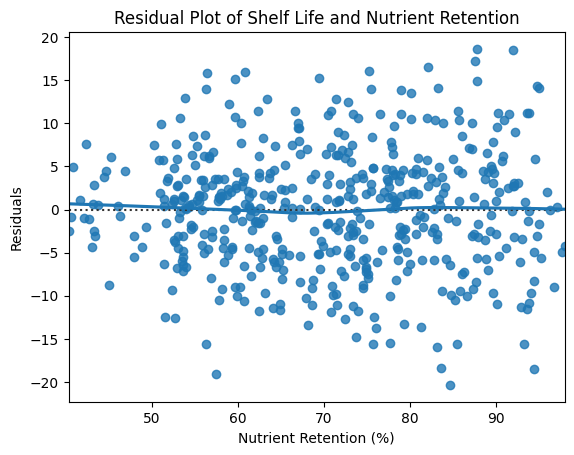

In [10]:
# Check for heteroscedasticity with a residual plot
sns.residplot(x='NutrientRetention', y='ShelfLife', 
         data=food_preservation, lowess=True)
plt.title('Residual Plot of Shelf Life and Nutrient Retention')
plt.xlabel('Nutrient Retention (%)')
plt.ylabel('Residuals')
plt.show()

The residual plot allows you to visually assess the heteroscedasticity between nutrient retention and shelf life, showing if the spread of residuals changes across nutrient retention levels. You can see some deviation away from the 0 line, so there may be some concerns about heteroscedasticit

## Exploring and transforming shelf life data
Understanding the distribution of different variables in our data is a key aspect of any data work including experimental analysis. The food_preservation dataset captures various food preservation methods and their impact on nutrient retention and shelf life. A crucial aspect of this data involves the shelf life of preserved foods, which can vary significantly across different preservation methods and food types.

The food_preservation DataFrame,  pandas as pd, numpy as np, seaborn as sns, and matplotlib.pyplot as plt have been loaded for you.


* Visualize the original distribution of the 'ShelfLife' column
* Apply a Box-Cox transformation to the 'ShelfLife' column.
* Visualize the distribution of the 'ShelfLifeTransformed'.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


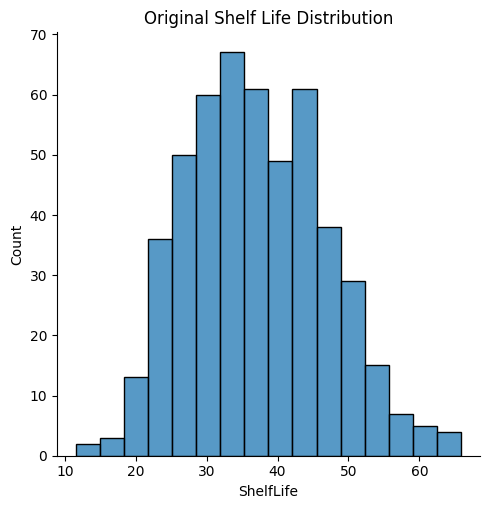

In [11]:
from scipy.stats import boxcox

# Visualize the original ShelfLife distribution
sns.displot(food_preservation['ShelfLife'])
plt.title('Original Shelf Life Distribution')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

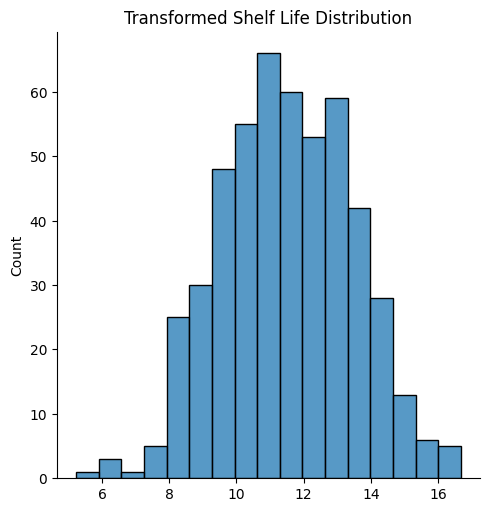

In [13]:
# Create a Box-Cox transformation
ShelfLifeTransformed, _ = boxcox(food_preservation['ShelfLife'])

# Visualize the transformed ShelfLife distribution
plt.clf()
sns.displot(ShelfLifeTransformed)
plt.title('Transformed Shelf Life Distribution')
plt.show()

Visualizing the original and transformed distributions provides valuable insights into the data's structure. The Box-Cox transformation helps stabilize variance, making the data more suitable for further statistical analysis by helping to make the ShelfLife follow a more normal shape.

# Applying nonparametric tests in experimental analysis

## Visualizing and testing preservation methods
As a food scientist, you're tasked with evaluating the effectiveness of different preservation methods on nutrient retention and how these methods impact shelf life. You have been provided with a dataset, food_preservation, that includes various types of food preserved by methods such as freezing and canning. Each entry in the dataset captures the nutrient retention and calculated shelf life for these foods, providing a unique opportunity to analyze the impacts of preservation techniques on food quality.


* Filter the DataFrame to include only Freezing and Canning rows.
* Create a violin plot to visualize the distribution of nutrient retention for different preservation methods.
* Extract the nutrient retention values for both Freezing and Canning entries.
* Perform a Mann Whitney U test to compare nutrient retention between Freezing and Canning methods.



In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
n_samples = 400

# Define food types and preservation methods
food_types = ['Fruit', 'Vegetable', 'Meat', 'Dairy', 'Grains']
preservation_methods = ['Freezing', 'Canning', 'Refrigeration', 'Drying', 'Vacuum Sealing']

# Create the DataFrame with emphasis on Freezing and Canning
food_preservation = pd.DataFrame({
    'FoodType': np.random.choice(food_types, size=n_samples, p=[0.25, 0.25, 0.2, 0.15, 0.15]),
    'PreservationMethod': np.random.choice(preservation_methods, size=n_samples, p=[0.35, 0.35, 0.15, 0.1, 0.05]),
    'NutrientRetention': np.zeros(n_samples),
    'ShelfLife': np.zeros(n_samples)
})

# Generate data with different distributions for Freezing vs Canning
for i in range(len(food_preservation)):
    method = food_preservation.loc[i, 'PreservationMethod']
    food_type = food_preservation.loc[i, 'FoodType']
    
    # Different nutrient retention distributions based on method
    if method == 'Freezing':
        # Freezing: higher nutrient retention, moderate variability
        nutrient = np.random.normal(loc=85, scale=8)
    elif method == 'Canning':
        # Canning: lower nutrient retention, higher variability
        nutrient = np.random.normal(loc=65, scale=12)
    elif method == 'Refrigeration':
        nutrient = np.random.normal(loc=75, scale=6)
    elif method == 'Drying':
        nutrient = np.random.normal(loc=55, scale=10)
    else:  # Vacuum Sealing
        nutrient = np.random.normal(loc=90, scale=5)
    
    # Add food type effect
    if food_type in ['Fruit', 'Vegetable']:
        nutrient += np.random.uniform(0, 5)
    elif food_type == 'Meat':
        nutrient -= np.random.uniform(0, 8)
    
    food_preservation.loc[i, 'NutrientRetention'] = max(30, min(nutrient, 98))
    
    # Shelf life calculation (correlated with nutrient retention)
    shelf_life_base = 10 + (food_preservation.loc[i, 'NutrientRetention'] / 100) * 40
    noise = np.random.normal(0, 5)
    food_preservation.loc[i, 'ShelfLife'] = max(5, shelf_life_base + noise)

print(food_preservation)
print(f"\nDataFrame shape: {food_preservation.shape}")
print(f"\nPreservation Method distribution:")
print(food_preservation['PreservationMethod'].value_counts())
print(f"\nNutrient Retention by method:")
print(food_preservation.groupby('PreservationMethod')['NutrientRetention'].describe())

      FoodType PreservationMethod  NutrientRetention  ShelfLife
0    Vegetable           Freezing          81.557646  44.980400
1       Grains             Drying          41.585548  36.068360
2        Dairy            Canning          67.206600  37.383117
3         Meat      Refrigeration          73.552730  43.326458
4        Fruit           Freezing          88.402176  50.831828
..         ...                ...                ...        ...
395     Grains             Drying          65.383888  38.680675
396     Grains             Drying          68.094729  34.397180
397  Vegetable            Canning          46.995051  29.801279
398      Dairy            Canning          87.479573  50.392070
399      Dairy             Drying          50.526781  36.615794

[400 rows x 4 columns]

DataFrame shape: (400, 4)

Preservation Method distribution:
PreservationMethod
Canning           141
Freezing          140
Refrigeration      53
Drying             43
Vacuum Sealing     23
Name: count, dtyp

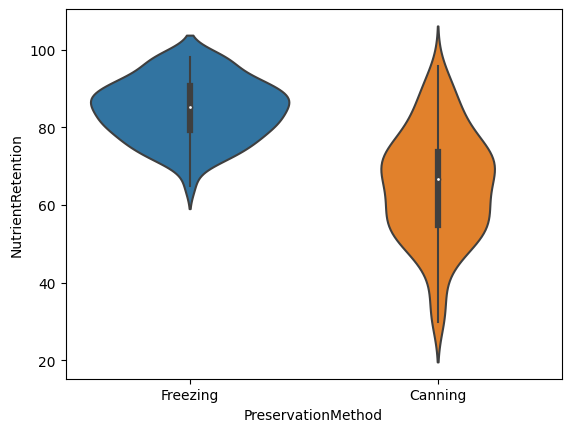

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Filter to Freezing and Canning data
condensed_food_data = food_preservation[food_preservation['PreservationMethod'].isin(['Freezing', 'Canning'])]

# Create a violin plot for nutrient retention by preservation method
sns.violinplot(data=condensed_food_data, 
               x="PreservationMethod", 
               y="NutrientRetention")
plt.show()

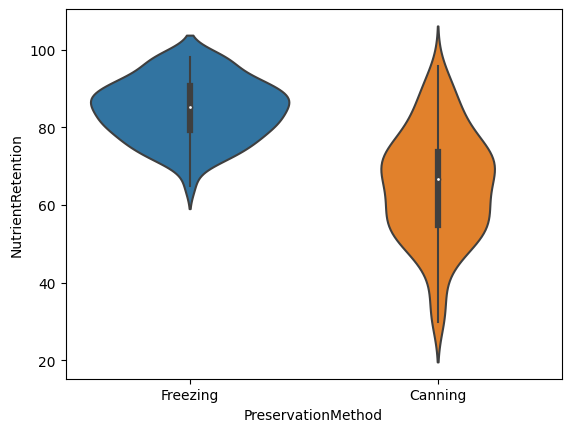

Mann Whitney U test p-value: {2.2285862596560712e-29, 4}


In [16]:
# Filter to Freezing and Canning data
condensed_food_data = food_preservation[food_preservation['PreservationMethod'].isin(['Freezing', 'Canning'])]

# Create a violin plot for nutrient retention by preservation method
sns.violinplot(data=condensed_food_data, 
               x="PreservationMethod", 
               y="NutrientRetention")
plt.show()

# Separate nutrient retention for Freezing and Canning methods
freezing = food_preservation[food_preservation['PreservationMethod'] == 'Freezing']['NutrientRetention']

canning = food_preservation[food_preservation['PreservationMethod'] == 'Canning']['NutrientRetention']

# Perform Mann Whitney U test
u_stat, p_val = mannwhitneyu(freezing, canning)

# Print the p-value
print("Mann Whitney U test p-value:", {p_val, 4})

The violin plot shows that the distribution and median values are similar across Freezing and Canning. The large p-value leads us to suspect that a statistical difference does not exist in the medians of nutrient retention for freezing versus canning preservation methods.

## Further analyzing food preservation techniques
In your role as a food scientist, you're exploring into the comparative effects of various food preservation methods on nutrient retention, utilizing a food_preservation dataset that includes measurements from freezing, canning, and drying methods. This dataset has been crafted to incorporate variations in shelf life that depend on the nutrient retention values, reflecting real-world scenarios where preservation efficacy varies significantly. Your analysis will involve visually exploring these differences using advanced plotting techniques and nonparametric tests.


* Create a boxen plot to explore the distribution of nutrient retention across the three different preservation methods.
* Separate nutrient retention for each preservation method.
* Perform a Kruskal-Wallis test to compare nutrient retention across all preservation methods.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

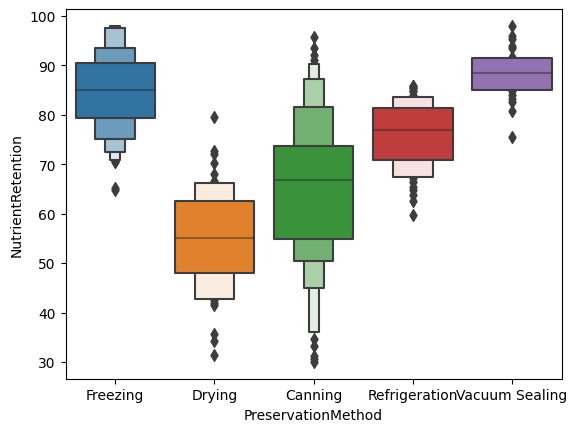

In [17]:
from scipy.stats import kruskal

# Create a boxen plot for nutrient retention by preservation
sns.boxenplot(data=food_preservation, 
              x="PreservationMethod", 
              y="NutrientRetention")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

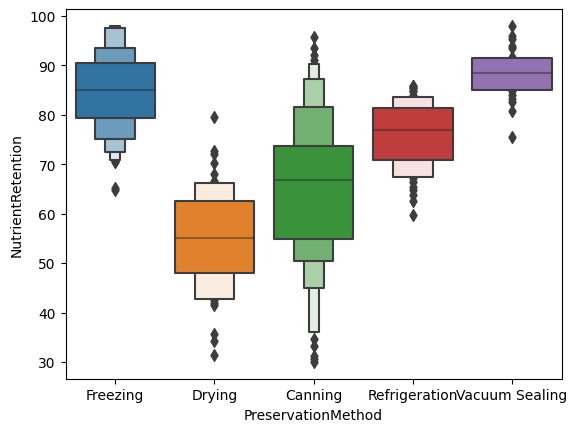

Kruskal-Wallis test p-value: 3.2261085704886646e-38


In [18]:
# Create a boxen plot for nutrient retention by preservation method
sns.boxenplot(data=food_preservation, 
              x="PreservationMethod", 
              y="NutrientRetention")
plt.show()

# Separate nutrient retention for each preservation method
freezing = food_preservation[food_preservation['PreservationMethod'] == 'Freezing']['NutrientRetention']
canning = food_preservation[food_preservation['PreservationMethod'] == 'Canning']['NutrientRetention']
drying = food_preservation[food_preservation['PreservationMethod'] == 'Drying']['NutrientRetention']

# Perform Kruskal-Wallis test
k_stat, k_pval = kruskal(freezing, canning, drying)

print("Kruskal-Wallis test p-value:", k_pval)

By effectively visualizing and statistically analyzing the nutrient retention across different preservation methods, you've gained insights into how these methods impact food quality. The boxen plot provided a deeper understanding of the data's distribution, and the Kruskal-Wallis test helped you assess the statistical differences between groups. The large p-value leads us to fail to conclude that a difference in the median values across the three groups of preservation methods exists for nutrient retention.